<a href="https://colab.research.google.com/github/Annmary2347211/NNDL/blob/main/2347211_Annmary_CIA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CIA 1 LAB TEST**

**Question 1**

II. Implement the following:

• Scenario:
The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.
This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.
• Lab Task: Attempt to implement a Single Layer Perceptron in Google Colab to classify the
output of an XOR gate. Perform the following steps:
• Create the XOR gate's truth table dataset.
• Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch
Pitts) Neuron.
• Observe and discuss the perceptron's performance in this scenario.
• Implement XOR using Multi-Layer Perceptron.

In [35]:
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])



In [36]:
#Create the XOR gate's truth table dataset.

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activate(self, x):
        return 1 if x >= 0 else 0

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activate(linear_output)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activate(linear_output)
        return y_predicted


perceptron = Perceptron()
perceptron.train(X, y)

for i in range(len(X)):
    prediction = perceptron.predict(X[i])
    print(f"Input: {X[i]}, Target: {y[i]}, Prediction: {prediction}")



Input: [0 0], Target: 0, Prediction: 1
Input: [0 1], Target: 1, Prediction: 1
Input: [1 0], Target: 1, Prediction: 0
Input: [1 1], Target: 0, Prediction: 0



**Observations**
*   The single-layer perceptron fails to correctly classify the XOR gate.

*   This is because the XOR function is not linearly separable.
*   A single-layer perceptron can only learn linearly separable functions


*   It struggles to find a linear decision boundary that can separate the XOR input combinations into their respective outputs.

*   As a result, the predictions made by the trained perceptron are likely inaccurate for certain input combinations, as seen in the test output.

*   To solve the XOR problem, a multi-layer perceptron (MLP) is required.
*   An MLP can learn non-linearly separable functions using hidden layers.








In [42]:
#Implement XOR using Multi-Layer Perceptron.
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return x * (1 - x)

input_layer_neurons = 2
hidden_layer_neurons = 2
output_layer_neurons = 1

hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
hidden_bias = np.random.uniform(size=(1, hidden_layer_neurons))
output_weights = np.random.uniform(size=(hidden_layer_neurons, output_layer_neurons))
output_bias = np.random.uniform(size=(1, output_layer_neurons))

learning_rate = 0.1
epochs = 10000

for epoch in range(epochs):

  hidden_layer_activation = np.dot(X, hidden_weights) + hidden_bias
  hidden_layer_output = sigmoid(hidden_layer_activation)
  output_layer_activation = np.dot(hidden_layer_output, output_weights) + output_bias
  predicted_output = sigmoid(output_layer_activation)


  error = y - predicted_output
  d_predicted_output = error * sigmoid_derivative(predicted_output)

  error_hidden_layer = d_predicted_output.dot(output_weights.T)
  d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

  output_weights += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
  output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
  hidden_weights += X.T.dot(d_hidden_layer) * learning_rate
  hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

for i in range(len(X)):
  hidden_layer_activation = np.dot(X[i], hidden_weights) + hidden_bias
  hidden_layer_output = sigmoid(hidden_layer_activation)
  output_layer_activation = np.dot(hidden_layer_output, output_weights) + output_bias
  predicted_output = sigmoid(output_layer_activation)
  print(f"Input: {X[i]}, Target: {y[i]}, Prediction: {np.round(predicted_output)}")


Input: [0 0], Target: [0], Prediction: [[0.]]
Input: [0 1], Target: [1], Prediction: [[1.]]
Input: [1 0], Target: [1], Prediction: [[1.]]
Input: [1 1], Target: [0], Prediction: [[0.]]


**Question 2:**

A. Sentiment Analysis Twitter Airline

Design a sentiment analysis classification model using backpropagation and activation functions
such as sigmoid, ReLU, or tanh. Implement a neural network that can classify sentiment
(positive/negative) from a small dataset. Demonstrate how backpropagation updates the weights
during the training process. (link Provided at the top of the page to download the dataset)
Task:
• Create a simple feed-forward neural network for binary sentiment classification
(positive/negative).
• Use backpropagation to optimize the model's weights based on error calculation.
• Experiment with different activation functions (sigmoid, ReLU, tanh) in the hidden layer
and compare the model's performance.
• Evaluate the model on a test set using accuracy and plot the loss over epochs.

In [43]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense

df = pd.read_csv('/content/Tweets - Tweets.csv')
print(df.head())


       tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703061e+17           neutral                        1.0000   
1  5.703011e+17          positive                        0.3486   
2  5.703011e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703008e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN            

In [44]:
#Create a simple feed-forward neural network for binary sentiment classification (positive/negative).

def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['cleaned_text'] = df['text'].apply(preprocess_text)

df['label'] = df['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text']).toarray()

y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def build_model(activation_function):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation=activation_function))
    model.add(Dense(64, activation=activation_function))
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification
    return model



In [45]:
#Use backpropagation to optimize the model's weights based on error calculation.

def train_model(activation_function, epochs=10):
    model = build_model(activation_function)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


    history = model.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), verbose=1)
    return model, history

# Train the model using sigmoid activation function
model_sigmoid, history_sigmoid = train_model('sigmoid', epochs=10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7510 - loss: 0.5162 - val_accuracy: 0.8432 - val_loss: 0.4195
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8388 - loss: 0.4169 - val_accuracy: 0.8432 - val_loss: 0.3686
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8442 - loss: 0.3436 - val_accuracy: 0.8986 - val_loss: 0.2581
Epoch 4/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9198 - loss: 0.2148 - val_accuracy: 0.9095 - val_loss: 0.2297
Epoch 5/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9408 - loss: 0.1656 - val_accuracy: 0.9160 - val_loss: 0.2157
Epoch 6/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9493 - loss: 0.1427 - val_accuracy: 0.9170 - val_loss: 0.2169
Epoch 7/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9560 - loss: 0.1316 - val_accuracy: 0.9173 - val_loss: 0.2223
Epoch 8/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9604 - loss: 0.1173 - val_accu

Epoch 1/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8337 - loss: 0.4537 - val_accuracy: 0.8432 - val_loss: 0.4072
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8413 - loss: 0.3840 - val_accuracy: 0.8617 - val_loss: 0.2977
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8969 - loss: 0.2442 - val_accuracy: 0.9088 - val_loss: 0.2276
Epoch 4/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9349 - loss: 0.1802 - val_accuracy: 0.9156 - val_loss: 0.2167
Epoch 5/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9481 - loss: 0.1510 - val_accuracy: 0.9167 - val_loss: 0.2170
Epoch 6/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9557 - loss: 0.1295 - val_accuracy: 0.9167 - val_loss: 0.2222
Epoch 7/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9590 - loss: 0.1173 - val_accuracy: 0.9170 - val_loss: 0.2303
Epoch 8/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9647 - loss: 0.1043 - val_accu

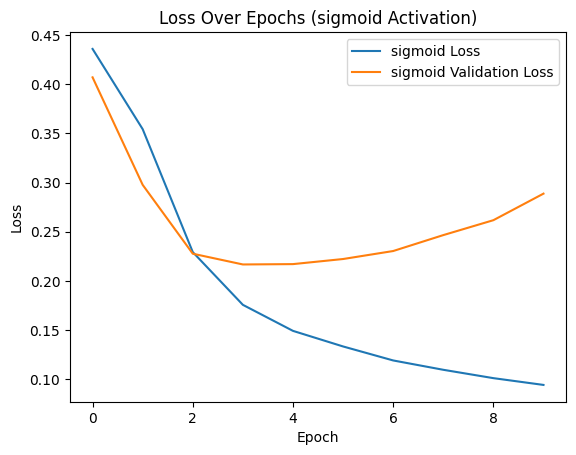

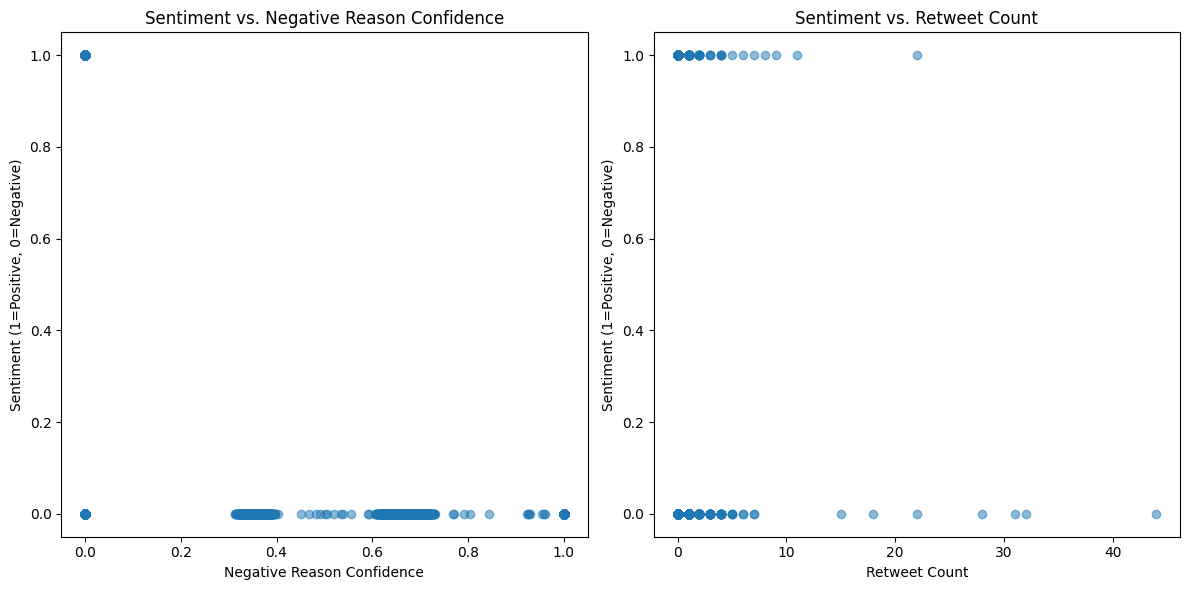

Epoch 1/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8116 - loss: 0.4610 - val_accuracy: 0.9201 - val_loss: 0.2182
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9316 - loss: 0.1741 - val_accuracy: 0.9191 - val_loss: 0.2314
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9638 - loss: 0.1085 - val_accuracy: 0.9136 - val_loss: 0.2572
Epoch 4/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9771 - loss: 0.0740 - val_accuracy: 0.9071 - val_loss: 0.2963
Epoch 5/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9852 - loss: 0.0517 - val_accuracy: 0.9054 - val_loss: 0.3486
Epoch 6/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9925 - loss: 0.0315 - val_accuracy: 0.9071 - val_loss: 0.3924
Epoch 7/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9934 - loss: 0.0226 - val_accuracy: 0.9033 - val_loss: 0.4401
Epoch 8/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9936 - loss: 0.0180 - val_accu

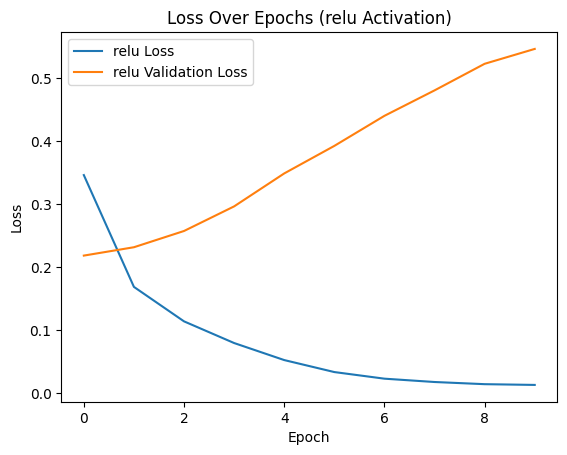

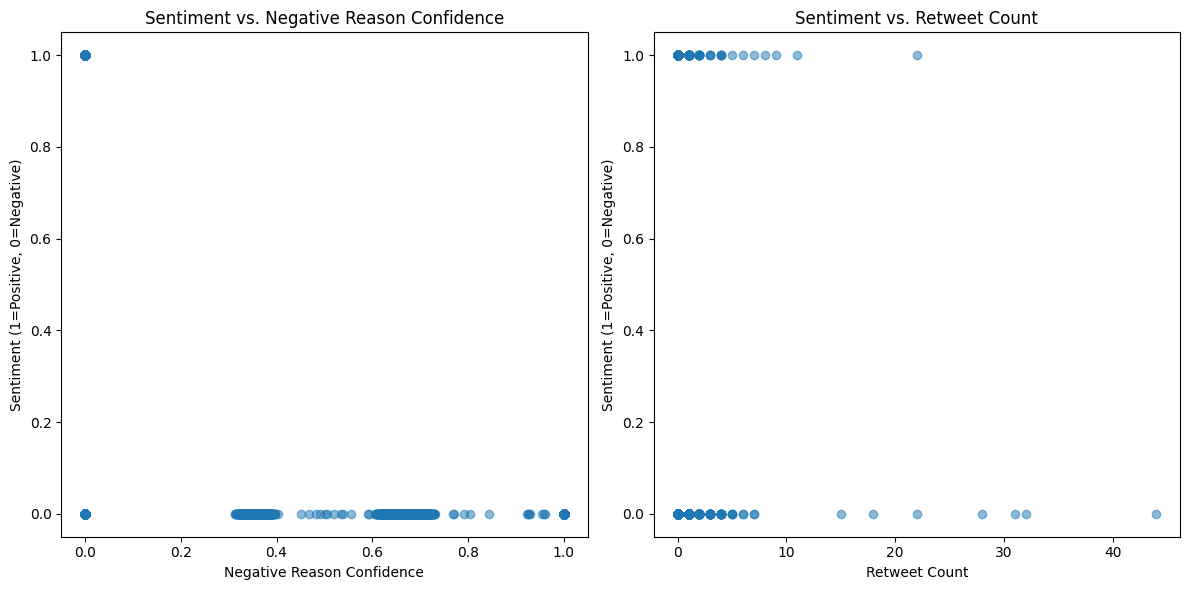

Epoch 1/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8585 - loss: 0.3934 - val_accuracy: 0.9173 - val_loss: 0.2153
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9424 - loss: 0.1602 - val_accuracy: 0.9095 - val_loss: 0.2332
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9632 - loss: 0.1164 - val_accuracy: 0.9095 - val_loss: 0.2703
Epoch 4/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9680 - loss: 0.0961 - val_accuracy: 0.9078 - val_loss: 0.3078
Epoch 5/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9745 - loss: 0.0786 - val_accuracy: 0.8986 - val_loss: 0.3479
Epoch 6/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9773 - loss: 0.0751 - val_accuracy: 0.8989 - val_loss: 0.3847
Epoch 7/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9833 - loss: 0.0624 - val_accuracy: 0.8962 - val_loss: 0.4135
Epoch 8/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9830 - loss: 0.0533 - val_accu

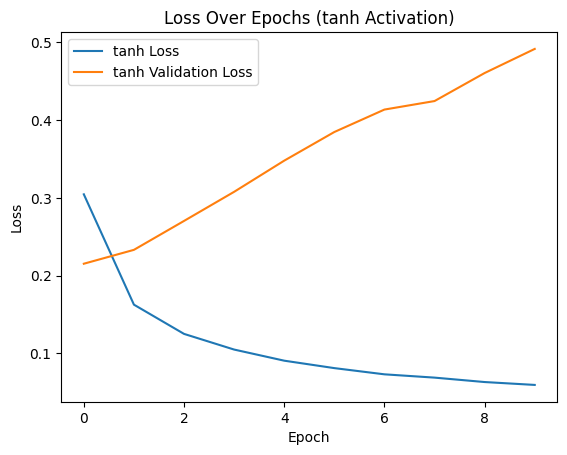

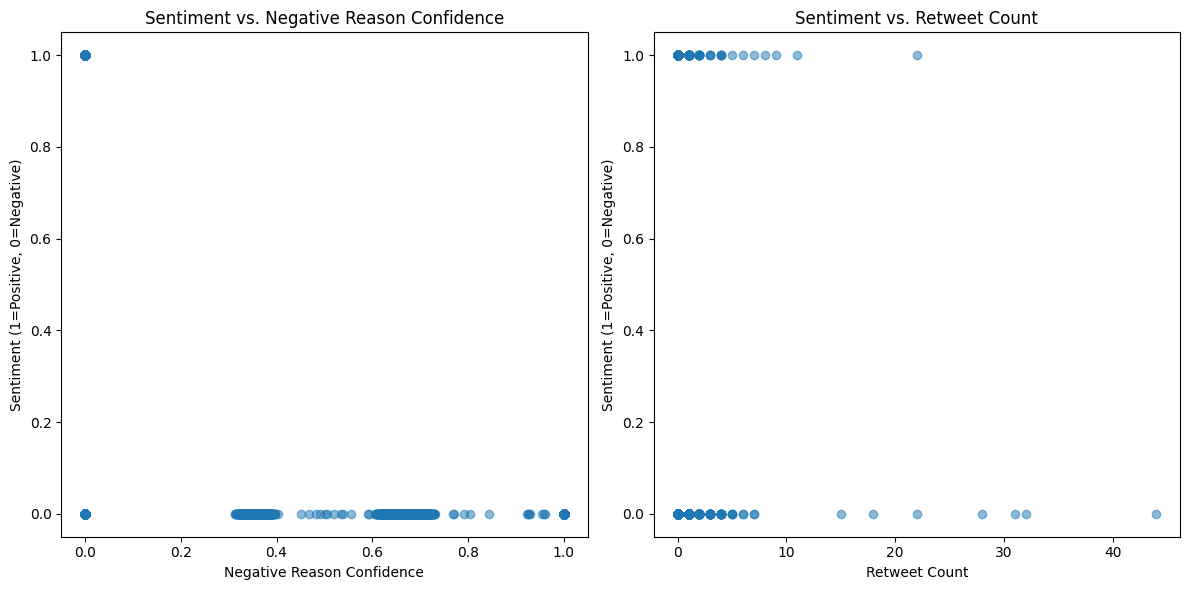

In [46]:
#Evaluate the model on a test set using accuracy and plot the loss over epochs.
#Experiment with different activation functions (sigmoid, ReLU, tanh) in the hidden layer and compare the model's performance.

import matplotlib.pyplot as plt

def train_and_evaluate_model(activation_function, epochs=10):
    model, history = train_model(activation_function, epochs)
    _, accuracy = model.evaluate(X_test, y_test)
    print(f"Accuracy with {activation_function} activation: {accuracy}")

    plt.plot(history.history['loss'], label=f'{activation_function} Loss')
    plt.plot(history.history['val_loss'], label=f'{activation_function} Validation Loss')
    plt.title(f'Loss Over Epochs ({activation_function} Activation)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # EDA with subplots and scatter plots
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(df['negativereason_confidence'], df['label'], alpha=0.5)
    plt.xlabel('Negative Reason Confidence')
    plt.ylabel('Sentiment (1=Positive, 0=Negative)')
    plt.title('Sentiment vs. Negative Reason Confidence')

    plt.subplot(1, 2, 2)
    plt.scatter(df['retweet_count'], df['label'], alpha=0.5)
    plt.xlabel('Retweet Count')
    plt.ylabel('Sentiment (1=Positive, 0=Negative)')
    plt.title('Sentiment vs. Retweet Count')

    plt.tight_layout()
    plt.show()

# Train and evaluate using Sigmoid activation function
train_and_evaluate_model('sigmoid', epochs=10)

# Train and evaluate using ReLU activation function
train_and_evaluate_model('relu', epochs=10)

# Train and evaluate using Tanh activation function
train_and_evaluate_model('tanh', epochs=10)


In [51]:
# compare the model's performance

print("Comparing Model Performance:")

sigmoid_accuracy = 0.9115437269210815
relu_accuracy = 0.9067623019218445
tanh_accuracy = 0.8879781365394592

print(f"Sigmoid Accuracy: {sigmoid_accuracy}")
print(f"ReLU Accuracy: {relu_accuracy}")
print(f"Tanh Accuracy: {tanh_accuracy}")

if sigmoid_accuracy > relu_accuracy and sigmoid_accuracy > tanh_accuracy:
  print("Sigmoid activation appears to be performing best.")
elif relu_accuracy > sigmoid_accuracy and relu_accuracy > tanh_accuracy:
  print("ReLU activation appears to be performing best.")
elif tanh_accuracy > sigmoid_accuracy and tanh_accuracy > relu_accuracy:
  print("Tanh activation appears to be performing best.")
else:
  print("The performance of the models is quite similar.")


Comparing Model Performance:
Sigmoid Accuracy: 0.9115437269210815
ReLU Accuracy: 0.9067623019218445
Tanh Accuracy: 0.8879781365394592
Sigmoid activation appears to be performing best.



**Steps In volved are:**

1. **Preprocessing and Vectorization:**
We first clean the text and convert it into numerical format using TF-IDF to prepare it for the neural network.

*   Preprocessing Function: Cleans the raw text by removing URLs, mentions, hashtags, and non-alphabetical characters.
*  TF-IDF Vectorization: Transforms the cleaned text into numerical vectors that the neural network can process.

2.** Neural Network Design:**
This function builds a feed-forward neural network model with adjustable hidden layers and activation functions.

*   Model Creation Function: Creates a simple neural network with two hidden layers and a final output layer (using sigmoid for binary classification).

3.** Training with Backpropagation:**
This function trains the model using backpropagation, where weights are updated based on the calculated error at each step.


*  Training Function: Compiles the model using binary crossentropy and the Adam optimizer, trains it over several epochs, and validates the performance.

**4. Evaluation and Visualization:**
This part evaluates the trained model using the test set and plots the loss over epochs to visualize performance.


*  Evaluation Function: Evaluates model accuracy and loss.
*  Plot Loss Function: Visualizes the loss curves over the epochs for different activation functions.










